In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import Data

In [162]:
BASE_DIR = 'E:\\workspace\\python\scikitlearn\\onbaording2\\ML-onboarding\\Patient Readmission Assignment\\'
patient_data = pd.read_csv(BASE_DIR + 'Patientdata.csv')
print(patient_data.shape)
patient_data.head()

(31513, 7)


,patientID,race,gender,age,weight,Target,istrain
0,PT456611,type3,Female,[90-100),NaN,No,1
1,PT956824,type1,Male,[50-60),NaN,Yes,1
2,PT453330,type3,Female,[80-90),NaN,No,1
3,PT677563,type3,Female,[50-60),NaN,No,1
4,PT102924,type3,Male,[60-70),NaN,Yes,1


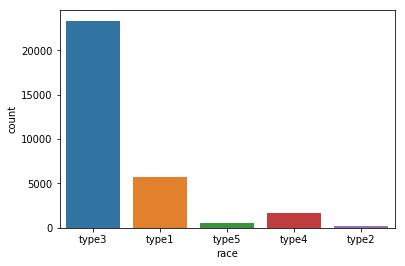

In [163]:
sns.countplot(patient_data['race'])

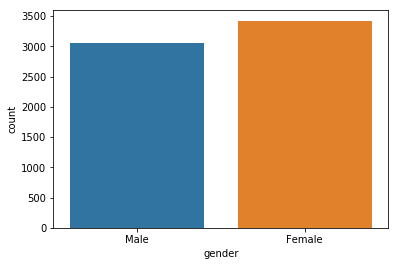

In [164]:
sns.countplot(patient_data.loc[patient_data['Target'] == 'Yes', 'gender'])

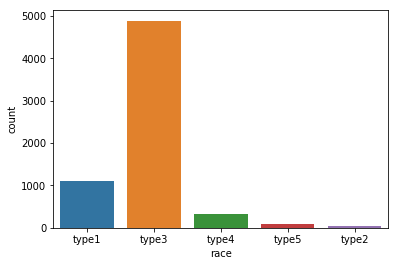

In [165]:
sns.countplot(patient_data.loc[patient_data['Target'] == 'Yes', 'race'])

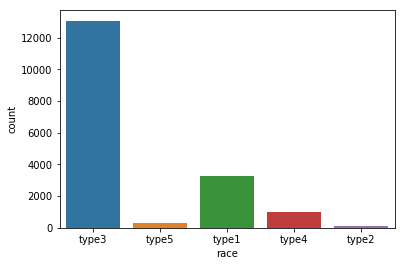

In [166]:
sns.countplot(patient_data.loc[patient_data['Target'] == 'No', 'race'])

In [167]:
hospital_data = pd.read_csv(BASE_DIR + 'HospitalData.csv')
print(hospital_data.shape)
hospital_data.head()

(31513, 9)


,AdmissionID,patientID,Admission_date,Discharge_date,admission_type_id,admission_source_id,payer_code,medical_specialty,istrain
0,AD988251,PT456611,2015-05-04,2015-05-07,1,1,PC8,NaN,1
1,AD725487,PT956824,2014-02-20,2014-02-23,1,7,PC1,Oncology,1
2,AD492141,PT453330,2015-06-01,2015-06-04,1,7,PC8,NaN,1
3,AD561393,PT677563,2015-12-18,2015-12-20,2,1,NaN,Cardiology,1
4,AD619257,PT102924,2015-08-19,2015-08-20,3,1,NaN,NaN,1


In [168]:
diagnosis_data = pd.read_csv(BASE_DIR + 'DiagnosisData.csv')
print(diagnosis_data.shape)
diagnosis_data.head()

(31513, 29)


,patientID,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,istrain
0,PT456611,0,11,9,None,None,No,No,No,No,...,No,No,Steady,No,No,No,No,Ch,Yes,1
1,PT956824,1,6,6,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1
2,PT453330,2,27,9,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1
3,PT677563,3,10,5,None,None,No,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,1
4,PT102924,6,12,9,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1


# Data Cleaning

In [169]:
patient_data.isnull().sum()

patientID        0
race             0
gender           0
age              0
weight       30569
Target        7257
istrain          0
dtype: int64

__Too many missing values, Dropping weight column__

In [170]:
patient_data = patient_data.drop(columns=['weight'])
patient_data.isnull().sum()

patientID       0
race            0
gender          0
age             0
Target       7257
istrain         0
dtype: int64

In [171]:
patient_data.groupby(['gender', 'Target']).count()

patientID  race   age  istrain
gender Target                                
Female No           9304  9304  9304     9304
       Yes          3423  3423  3423     3423
Male   No           8482  8482  8482     8482
       Yes          3047  3047  3047     3047

In [172]:
patient_data['Target'].value_counts()

No     17786
Yes     6470
Name: Target, dtype: int64

In [173]:
hospital_data.isnull().sum()

AdmissionID                0
patientID                  0
Admission_date             0
Discharge_date             0
admission_type_id          0
admission_source_id        0
payer_code             13210
medical_specialty      14938
istrain                    0
dtype: int64

In [174]:
hospital_data.groupby(['payer_code', 'medical_specialty']).count().shape

(296, 7)

In [175]:
for col in hospital_data.columns.values:
    print(col + ' - ms', hospital_data.groupby([col, 'medical_specialty']).count().shape)
    print(col + ' - pc', hospital_data.groupby([col, 'payer_code']).count().shape)
    print(col + ' - pc + ms', hospital_data.groupby([col, 'payer_code', 'medical_specialty']).count().shape)

AdmissionID - ms (12779, 7)
AdmissionID - pc (14045, 7)
AdmissionID - pc + ms (6772, 6)
patientID - ms (12779, 7)
patientID - pc (14045, 7)
patientID - pc + ms (6772, 6)
Admission_date - ms (6898, 7)
Admission_date - pc (5494, 7)
Admission_date - pc + ms (5955, 6)
Discharge_date - ms (6932, 7)
Discharge_date - pc (5503, 7)
Discharge_date - pc + ms (5913, 6)
admission_type_id - ms (203, 7)
admission_type_id - pc (65, 7)
admission_type_id - pc + ms (574, 6)
admission_source_id - ms (218, 7)
admission_source_id - pc (95, 7)
admission_source_id - pc + ms (604, 6)
payer_code - ms (296, 7)
payer_code - pc (17, 8)
payer_code - pc + ms (296, 7)
medical_specialty - ms (63, 8)
medical_specialty - pc (296, 7)
medical_specialty - pc + ms (296, 7)
istrain - ms (114, 7)
istrain - pc (33, 7)
istrain - pc + ms (492, 6)


In [176]:
hospital_data['admission_type_id'].value_counts()

1    15875
3     6516
2     5804
6     1724
5     1423
8      151
7       16
4        4
Name: admission_type_id, dtype: int64

In [177]:
for i in range(1, 9):
    temp_1 = hospital_data[hospital_data['admission_type_id'] == i].isnull().sum()
    print(i, temp_1['payer_code'], temp_1['medical_specialty'])

1 6187 9199
2 2272 1834
3 2400 2504
4 3 2
5 475 925
6 1722 438
7 0 16
8 151 20


In [178]:
hospital_data.isnull().sum()[['payer_code', 'medical_specialty']]

payer_code           13210
medical_specialty    14938
dtype: int64

__Could not find any correlation between payer_code and medical_specialty and other columns__

since missing values are close to 50% dropping both the columns

In [179]:
hospital_data = hospital_data.drop(columns=['payer_code', 'medical_specialty'])
hospital_data.shape

(31513, 7)

In [180]:
hospital_data[hospital_data['admission_type_id'] == 4]

,AdmissionID,patientID,Admission_date,Discharge_date,admission_type_id,admission_source_id,istrain
4081,AD203665,PT211934,2015-09-13,2015-09-15,4,4,1
9335,AD455935,PT861212,2016-01-27,2016-01-29,4,1,1
14038,AD667173,PT387379,2015-05-20,2015-05-23,4,14,1
25520,AD203665,PT211934,2015-09-13,2015-09-15,4,4,0


In [181]:
hospital_data['Admission_date'] = pd.to_datetime(hospital_data['Admission_date'], format='%Y-%m-%d')
hospital_data['Admission_date'].dtype

dtype('<M8[ns]')

In [182]:
hospital_data['Admission_date'] = hospital_data['Admission_date'].map(lambda x:100*x.year + x.month)
hospital_data['Admission_date'].head()

0    201505
1    201402
2    201506
3    201512
4    201508
Name: Admission_date, dtype: int64

In [183]:
hospital_data['Discharge_date'] = pd.to_datetime(hospital_data['Discharge_date'], format='%Y-%m-%d')
hospital_data['Discharge_date'].dtype

dtype('<M8[ns]')

In [184]:
hospital_data['Discharge_date'] = hospital_data['Discharge_date'].map(lambda x:100*x.year + x.month)
hospital_data['Discharge_date'].head()

0    201505
1    201402
2    201506
3    201512
4    201508
Name: Discharge_date, dtype: int64

In [185]:
diagnosis_data.isnull().sum()

patientID                  0
num_procedures             0
num_medications            0
num_diagnoses              0
max_glu_serum              0
A1Cresult                  0
metformin                  0
repaglinide                0
nateglinide                0
chlorpropamide             0
glimepiride                0
acetohexamide              0
glipizide                  0
glyburide                  0
tolbutamide                0
pioglitazone               0
rosiglitazone              0
acarbose                   0
miglitol                   0
troglitazone               0
tolazamide                 0
insulin                    0
glyburide.metformin        0
glipizide.metformin        0
metformin.rosiglitazone    0
metformin.pioglitazone     0
change                     0
diabetesMed                0
istrain                    0
dtype: int64

In [186]:
for col in diagnosis_data.columns.values:
    print(col, diagnosis_data[col].unique().shape)

patientID (24256,)
num_procedures (7,)
num_medications (70,)
num_diagnoses (15,)
max_glu_serum (4,)
A1Cresult (4,)
metformin (4,)
repaglinide (4,)
nateglinide (4,)
chlorpropamide (4,)
glimepiride (4,)
acetohexamide (1,)
glipizide (4,)
glyburide (4,)
tolbutamide (2,)
pioglitazone (4,)
rosiglitazone (4,)
acarbose (3,)
miglitol (2,)
troglitazone (2,)
tolazamide (2,)
insulin (4,)
glyburide.metformin (3,)
glipizide.metformin (2,)
metformin.rosiglitazone (1,)
metformin.pioglitazone (2,)
change (2,)
diabetesMed (2,)
istrain (2,)


__Removing columns with only one unique value__

In [187]:
diagnosis_data = diagnosis_data.drop(columns=['acetohexamide', 'metformin.rosiglitazone'])
diagnosis_data.shape

(31513, 27)

In [188]:
diagnosis_data['num_medications'].unique()

array([11,  6, 27, 10, 12,  7, 16,  5, 15, 26, 13,  4, 20, 25, 19,  9, 24,
       21, 14, 22, 17,  3, 43,  8, 18, 31, 23, 28, 35,  2, 60, 46, 30, 33,
       34, 38, 29, 48, 37, 39, 32, 41, 55,  1, 42, 51, 53, 45, 40, 36, 47,
       44, 58, 49, 56, 63, 50, 52, 59, 64, 57, 54, 68, 72, 62, 65, 61, 81,
       70, 67], dtype=int64)

In [189]:
diagnosis_data['num_medications'].max()

81

In [190]:
diagnosis_data['num_medications'] = pd.cut(diagnosis_data['num_medications'], bins=8, labels=[0, 1, 2, 3, 4, 5, 6, 7])

__Separating Test data__

In [191]:
patient_test_data = patient_data[patient_data['istrain'] == 0]
patient_test_data.shape

(7257, 6)

In [192]:
patient_data = patient_data[patient_data['istrain'] == 1]
patient_data.shape

(24256, 6)

In [193]:
hospital_test_data = hospital_data[hospital_data['istrain'] == 0]
print(hospital_test_data.shape)
hospital_data = hospital_data[hospital_data['istrain'] == 1]
print(hospital_data.shape)
diagnosis_test_data = diagnosis_data[diagnosis_data['istrain'] == 0]
print(diagnosis_test_data.shape)
diagnosis_data = diagnosis_data[diagnosis_data['istrain'] == 1]
print(diagnosis_data.shape)

(7257, 7)
(24256, 7)
(7257, 27)
(24256, 27)


In [194]:
test_data = patient_test_data.merge(hospital_test_data.merge(diagnosis_test_data, on='patientID'), on='patientID')
test_data.shape

(7257, 38)

In [195]:
data = patient_data.merge(hospital_data.merge(diagnosis_data, on='patientID'), on='patientID')
data.shape

(24256, 38)

__removing useless columns__

In [196]:
data = data.drop(columns=['istrain'])
if 'istrain_x' in data:
    data = data.drop(columns=['istrain_x'])
if 'istrain_y' in data:
    data = data.drop(columns=['istrain_y'])
data.shape

(24256, 35)

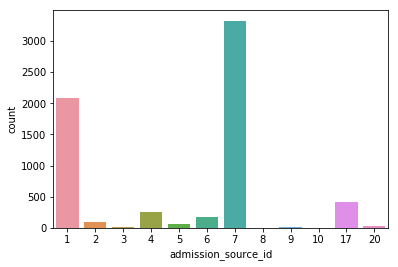

In [197]:
sns.countplot(data.loc[data['Target'] == 'Yes', 'admission_source_id'])

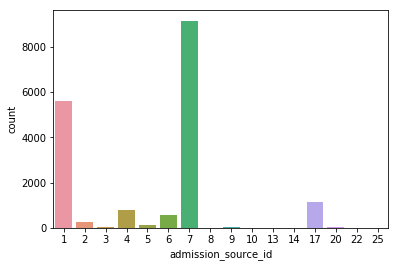

In [198]:
sns.countplot(data.loc[data['Target'] == 'No', 'admission_source_id'])

In [199]:
data.loc[(data['Target'] == 1) & (data['admission_source_id'] > 20)].shape

(0, 35)

__for values between 10 - 17 and values greater than 20 target is always 0__

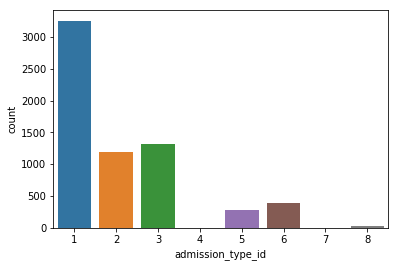

In [200]:
sns.countplot(data.loc[data['Target'] == 'Yes', 'admission_type_id'])

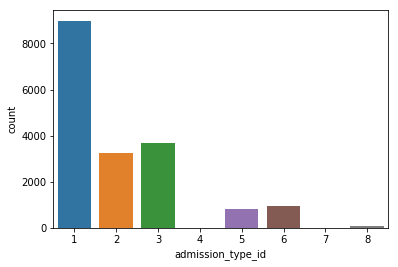

In [201]:
sns.countplot(data.loc[data['Target'] == 'No', 'admission_type_id'])

# Label Encoding

In [202]:
from sklearn.preprocessing import LabelEncoder

__No use for patientID and AdmissionID in the data, removing those__

In [203]:
data = data.drop(columns=['patientID', 'AdmissionID'])
data.shape

(24256, 33)

In [204]:
for col in data.columns.values:
    if data[col].dtype == 'object':
        print(col, data[col].unique().shape)

race (5,)
gender (2,)
age (10,)
Target (2,)
max_glu_serum (4,)
A1Cresult (4,)
metformin (4,)
repaglinide (4,)
nateglinide (4,)
chlorpropamide (4,)
glimepiride (4,)
glipizide (4,)
glyburide (4,)
tolbutamide (2,)
pioglitazone (4,)
rosiglitazone (4,)
acarbose (3,)
miglitol (2,)
troglitazone (2,)
tolazamide (2,)
insulin (4,)
glyburide.metformin (3,)
glipizide.metformin (2,)
metformin.pioglitazone (2,)
change (2,)
diabetesMed (2,)


__Ordinal columns from above columns:__
race, gender, age, medical_specialty and all the meds from diagnosis table

In [205]:
for col in data.columns.values:
    if data[col].dtype != 'object':
        print(col, data[col].unique().shape)

Admission_date (30,)
Discharge_date (31,)
admission_type_id (8,)
admission_source_id (16,)
num_procedures (7,)
num_medications (8,)
num_diagnoses (15,)


In [206]:
le = LabelEncoder()
ordinal_cols = ['race', 'gender', 'age', 'Target', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'metformin.pioglitazone', 'change', 'diabetesMed']
for col in ordinal_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Base Model

In [207]:
X = data[data.columns.difference(['Target'])]
y = data['Target']

In [208]:
X.head()

,A1Cresult,Admission_date,Discharge_date,acarbose,admission_source_id,admission_type_id,age,change,chlorpropamide,diabetesMed,...,num_diagnoses,num_medications,num_procedures,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone
0,2,201505,201505,0,1,1,9,0,1,1,...,9,0,0,1,2,1,2,0,0,0
1,2,201402,201402,0,7,1,5,1,1,0,...,6,0,1,1,0,1,1,0,0,0
2,2,201506,201506,0,7,1,8,1,1,0,...,9,2,2,1,2,1,1,0,0,0
3,2,201512,201512,0,1,2,5,1,1,1,...,5,0,3,1,2,1,1,0,0,0
4,2,201508,201508,0,1,3,6,1,1,0,...,9,1,6,1,2,1,1,0,0,0


In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=5)
print(scores)
scores.mean()

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

[0.69682605 0.70356627 0.70253556 0.70377242 0.69882498]


0.7011050576767218

In [210]:
y.value_counts()

0    17786
1     6470
Name: Target, dtype: int64

In [211]:
null_accuracy = 17786/(17786 + 6470)
null_accuracy

0.7332618733509235

In [212]:
def isGoodModel(scores):
    print(scores)
    print(scores.mean(), scores.mean() > null_accuracy)

In [213]:
X.columns.values

array(['A1Cresult', 'Admission_date', 'Discharge_date', 'acarbose',
       'admission_source_id', 'admission_type_id', 'age', 'change',
       'chlorpropamide', 'diabetesMed', 'gender', 'glimepiride',
       'glipizide', 'glipizide.metformin', 'glyburide',
       'glyburide.metformin', 'insulin', 'max_glu_serum', 'metformin',
       'metformin.pioglitazone', 'miglitol', 'nateglinide',
       'num_diagnoses', 'num_medications', 'num_procedures',
       'pioglitazone', 'race', 'repaglinide', 'rosiglitazone',
       'tolazamide', 'tolbutamide', 'troglitazone'], dtype=object)

__Trying logistic regression__

In [214]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppDa

[0.73330585 0.73325088 0.73325088 0.73325088 0.73325088]
0.7332618715376931 False


__choosing logistic regression for base model__

# Feature Engineering and Feature Selection

In [215]:
for col in data.columns.values:
    print(col, 'Yes\n', data.loc[(data['Target'] == 1), col].value_counts())
    print(col, 'No\n', data.loc[(data['Target'] == 0), col].value_counts())

race Yes
 2    4891
0    1114
3     327
4      99
1      39
Name: race, dtype: int64
race No
 2    13063
0     3267
3      991
4      330
1      135
Name: race, dtype: int64
gender Yes
 0    3423
1    3047
Name: gender, dtype: int64
gender No
 0    9304
1    8482
Name: gender, dtype: int64
age Yes
 7    1695
6    1494
8    1075
5    1022
4     604
3     223
9     199
2     103
1      42
0      13
Name: age, dtype: int64
age No
 7    4297
6    3872
5    3254
8    2710
4    1807
3     805
9     517
2     319
1     154
0      51
Name: age, dtype: int64
Target Yes
 1    6470
Name: Target, dtype: int64
Target No
 0    17786
Name: Target, dtype: int64
Admission_date Yes
 201603    238
201601    235
201503    235
201412    235
201405    232
201511    229
201411    227
201505    226
201501    226
201410    224
201510    222
201507    222
201504    221
201605    220
201606    219
201401    212
201602    211
201508    210
201604    209
201402    209
201407    208
201403    208
201409    207
2015

In [216]:
for col in data.columns.values:
    print(col, data[col].unique().shape)

race (5,)
gender (2,)
age (10,)
Target (2,)
Admission_date (30,)
Discharge_date (31,)
admission_type_id (8,)
admission_source_id (16,)
num_procedures (7,)
num_medications (8,)
num_diagnoses (15,)
max_glu_serum (4,)
A1Cresult (4,)
metformin (4,)
repaglinide (4,)
nateglinide (4,)
chlorpropamide (4,)
glimepiride (4,)
glipizide (4,)
glyburide (4,)
tolbutamide (2,)
pioglitazone (4,)
rosiglitazone (4,)
acarbose (3,)
miglitol (2,)
troglitazone (2,)
tolazamide (2,)
insulin (4,)
glyburide.metformin (3,)
glipizide.metformin (2,)
metformin.pioglitazone (2,)
change (2,)
diabetesMed (2,)


__calculating chi2 value for features__

In [217]:
from sklearn.feature_selection import chi2

X = data[data.columns.difference(['Target'])]
y = data['Target']
correlation_matrix = chi2(X, y)

In [218]:
p_vals = correlation_matrix[1]
for i in range(len(X.columns.values)):
    print(X.columns.values[i], p_vals[i])

A1Cresult 0.9454753289383896
Admission_date 0.7608471313234595
Discharge_date 0.7380568030555732
acarbose 0.29695868099957695
admission_source_id 0.6053921892080572
admission_type_id 0.4143971550539176
age 2.2644755735201055e-05
change 0.04984980574244582
chlorpropamide 0.9783707883303392
diabetesMed 0.0008585041258079548
gender 0.5522723187193642
glimepiride 0.6852828134875402
glipizide 0.5918384263628871
glipizide.metformin 0.5464203024817722
glyburide 0.5168980226935775
glyburide.metformin 0.3046625968333824
insulin 0.6076832691312437
max_glu_serum 0.9612858623707589
metformin 0.4676625681627573
metformin.pioglitazone 0.5464203024817722
miglitol 0.7942356704672777
nateglinide 0.9698564512840893
num_diagnoses 1.4421348501272527e-11
num_medications 1.9093083898014303e-08
num_procedures 0.5892137096588368
pioglitazone 0.9031935414103401
race 0.4986085097939813
repaglinide 0.834896494676853
rosiglitazone 0.8486762105729088
tolazamide 0.34065576411673926
tolbutamide 0.17745066816140465
t

In [219]:
p_vals = correlation_matrix[1]
unrelated_cols = []
for i in range(len(X.columns.values)):
    if p_vals[i] < 0.05:
        print(X.columns.values[i], p_vals[i])
    else:
        unrelated_cols.append(X.columns.values[i])

age 2.2644755735201055e-05
change 0.04984980574244582
diabetesMed 0.0008585041258079548
num_diagnoses 1.4421348501272527e-11
num_medications 1.9093083898014303e-08


In [220]:
X = data[['age', 'change', 'diabetesMed', 'num_diagnoses', 'num_medications']]
y = data['Target']

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santhosh.kapuluru\AppDa

[0.73330585 0.73325088 0.73325088 0.73325088 0.73325088]
0.7332618715376931 False


__accuracy did not change__
so removing the other columns from data.

In [221]:
data = data[['age', 'change', 'diabetesMed', 'num_diagnoses', 'num_medications', 'Target']]
data.shape

(24256, 6)

In [222]:
data.head()

,age,change,diabetesMed,num_diagnoses,num_medications,Target
0,9,0,1,9,0,0
1,5,1,0,6,0,1
2,8,1,0,9,2,0
3,5,1,1,5,0,0
4,6,1,0,9,1,1


# Model Selection

In [223]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
scores = cross_val_score(lsvc, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.73330585 0.73325088 0.73325088 0.73325088 0.73325088]
0.7332618715376931 False


C:\Users\santhosh.kapuluru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

[0.67188788 0.68996083 0.66707895 0.67779839 0.6672851 ]
0.6748022309675825 False


In [226]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=250)
scores = cross_val_score(abc, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

[0.73309975 0.73304473 0.73345702 0.73345702 0.73345702]
0.7333031086475911 True


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', n_estimators=200)
scores = cross_val_score(gbc, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

[0.73330585 0.73325088 0.7324263  0.73283859 0.73283859]
0.7329320426364354 False


In [228]:
data['num_medications'] = le.fit_transform(data['num_medications'])
X = data[['age', 'change', 'diabetesMed', 'num_diagnoses', 'num_medications']]
y = data['Target']

In [229]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
scores = cross_val_score(xgbc, X, y, scoring='accuracy', cv=5)
isGoodModel(scores)

[0.73309975 0.73325088 0.73304473 0.73345702 0.73345702]
0.7332618800349339 True


__AdaBoostClassifier and XGBoostClassifier__ by far has the best accuracy

# Model Tuning

In [230]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 150, 200, 250, 300]
}

grid_search = GridSearchCV(AdaBoostClassifier(), params, scoring='accuracy', cv=3)
grid_search.fit(X, y)
print(grid_search.best_score_, grid_search.best_params_)
rfc_cv_results = pd.DataFrame(grid_search.cv_results_)

0.7332618733509235 {'n_estimators': 250}


In [231]:
from sklearn.tree import DecisionTreeClassifier

params = {
    "base_estimator__criterion" : ["gini", "entropy"],
    "base_estimator__splitter" :   ["best", "random"],
}

dtc = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator = dtc)
grid_search = GridSearchCV(abc, param_grid=params, scoring = 'accuracy', cv=3)
grid_search.fit(X, y)
print(grid_search.best_score_, grid_search.best_params_)
abc_cv_results = pd.DataFrame(grid_search.cv_results_)

0.7246866754617414 {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best'}


In [232]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

abc = AdaBoostClassifier(n_estimators=250)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3)
sss.get_n_splits(X, y)
scores = []; i=1; total_score = 0
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    total_score += score
    print(i, 'iter complete')
    i += 1
total_score/5

1 iter complete
2 iter complete
3 iter complete
4 iter complete
5 iter complete


0.7332692043424488

In [233]:
scores

[0.7332692043424488,
 0.7332692043424488,
 0.7332692043424488,
 0.7332692043424488,
 0.7332692043424488]

In [234]:
test_data.head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.pioglitazone,change,diabetesMed,istrain_y
0,PT456611,type3,Female,[90-100),NaN,0,AD988251,201505,201505,1,...,No,No,No,Steady,No,No,No,Ch,Yes,0
1,PT956824,type1,Male,[50-60),NaN,0,AD725487,201402,201402,1,...,No,No,No,No,No,No,No,No,No,0
2,PT453330,type3,Female,[80-90),NaN,0,AD492141,201506,201506,1,...,No,No,No,No,No,No,No,No,No,0
3,PT677563,type3,Female,[50-60),NaN,0,AD561393,201512,201512,2,...,No,No,No,Steady,No,No,No,No,Yes,0
4,PT102924,type3,Male,[60-70),NaN,0,AD619257,201508,201508,3,...,No,No,No,No,No,No,No,No,No,0


In [235]:
final_test = test_data[['age', 'change', 'diabetesMed', 'num_diagnoses', 'num_medications']]
final_test.head()

,age,change,diabetesMed,num_diagnoses,num_medications
0,[90-100),Ch,Yes,9,0
1,[50-60),No,No,6,0
2,[80-90),No,No,9,2
3,[50-60),No,Yes,5,0
4,[60-70),No,No,9,1


In [236]:
data.head()

,age,change,diabetesMed,num_diagnoses,num_medications,Target
0,9,0,1,9,0,0
1,5,1,0,6,0,1
2,8,1,0,9,2,0
3,5,1,1,5,0,0
4,6,1,0,9,1,1


In [238]:
for col in ['age', 'change', 'diabetesMed']:
    final_test[col] = le.fit_transform(final_test[col].astype(str))
final_test.head()

,age,change,diabetesMed,num_diagnoses,num_medications
0,9,0,1,9,0
1,5,1,0,6,0
2,8,1,0,9,2
3,5,1,1,5,0
4,6,1,0,9,1


In [240]:
test_data_predictions = abc.predict(final_test)

In [254]:
final_output['patientID'] = test_data['patientID'].astype(str)
final_output['Target'] = test_data_predictions
final_output = final_output[['patientID', 'Target']]
final_output.head()

,patientID,Target
0,PT456611,0
1,PT956824,0
2,PT453330,0
3,PT677563,0
4,PT102924,0


In [257]:
file_name = 'E:\\workspace\\python\\scikitlearn\\onbaording2\\ML-onboarding\\Patient Readmission Assignment\\final_output.csv'
final_output.to_csv(file_name, sep='\t')